## 1. Welcome!
<p><img src="https://assets.datacamp.com/production/project_1170/img/office_cast.jpeg" alt="Markdown">.</p>
<p><strong>The Office!</strong> What started as a British mockumentary series about office culture in 2001 has since spawned ten other variants across the world, including an Israeli version (2010-13), a Hindi version (2019-), and even a French Canadian variant (2006-2007). Of all these iterations (including the original), the American series has been the longest-running, spanning 201 episodes over nine seasons.</p>
<p>In this notebook, we will take a look at a dataset of The Office episodes, and try to understand how the popularity and quality of the series varied over time. To do so, we will use the following dataset: <code>datasets/office_episodes.csv</code>, which was downloaded from Kaggle <a href="https://www.kaggle.com/nehaprabhavalkar/the-office-dataset">here</a>.</p>
<p>This dataset contains information on a variety of characteristics of each episode. In detail, these are:
<br></p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/office_episodes.csv</b></div>
<ul>
    <li><b>episode_number:</b> Canonical episode number.</li>
    <li><b>season:</b> Season in which the episode appeared.</li>
    <li><b>episode_title:</b> Title of the episode.</li>
    <li><b>description:</b> Description of the episode.</li>
    <li><b>ratings:</b> Average IMDB rating.</li>
    <li><b>votes:</b> Number of votes.</li>
    <li><b>viewership_mil:</b> Number of US viewers in millions.</li>
    <li><b>duration:</b> Duration in number of minutes.</li>
    <li><b>release_date:</b> Airdate.</li>
    <li><b>guest_stars:</b> Guest stars in the episode (if any).</li>
    <li><b>director:</b> Director of the episode.</li>
    <li><b>writers:</b> Writers of the episode.</li>
    <li><b>has_guests:</b> True/False column for whether the episode contained guest stars.</li>
    <li><b>scaled_ratings:</b> The ratings scaled from 0 (worst-reviewed) to 1 (best-reviewed).</li>
</ul>
    </div>

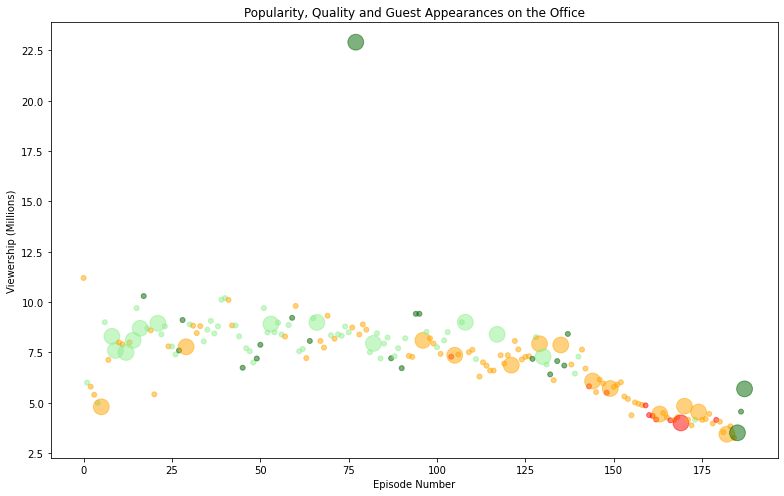

In [1]:
#Project Task: Visualise viewership, ratings and guest appearances using matplotlib and pandas 
# import pandas library and import office_episodes as dataframe
import pandas as pd
import matplotlib.pyplot as plt
office_episodes = pd.read_csv('datasets/office_episodes.csv')
plt.rcParams['figure.figsize'] = [11, 7]

#Color List conditional on scaled ratings of each episode
scaled_ratings = office_episodes['scaled_ratings']
color_list = []
for i in scaled_ratings: 
    if i < 0.25:
        color_list.append("red")
    elif i >= 0.25 and i < 0.50:
        color_list.append("orange")
    elif i >=0.50 and i < 0.75:
        color_list.append("lightgreen")
    else:
        color_list.append("darkgreen")
        
#Marker Sizing conditional on episodes with guest appearance
guest_appearance = office_episodes['has_guests']
size_system = []
for i in guest_appearance:
    if i == True:
        size_system.append(250)
    else: 
        size_system.append(25)        
        
#Scatterplot of Viewership (in millions) against Episode Number
office_episodes.plot('episode_number','viewership_mil',kind='scatter',s=size_system, c=color_list, alpha =0.5)
plt.title('Popularity, Quality and Guest Appearances on the Office')
plt.xlabel('Episode Number')
plt.ylabel('Viewership (Millions)')
plt.show()

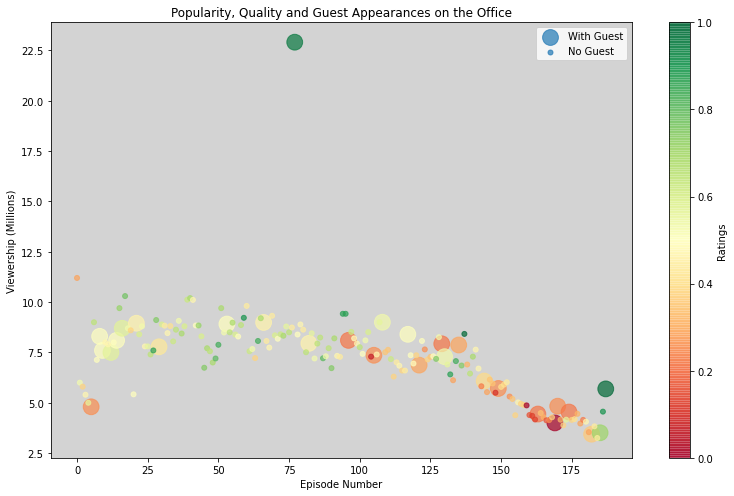

In [7]:
# Own adaptation of the assignment
# import pandas library and import office_episodes as dataframe
import pandas as pd
import matplotlib.pyplot as plt
office_episodes = pd.read_csv('datasets/office_episodes.csv')
plt.rcParams['figure.figsize'] = [11, 7]        

#Subsetting for dataset with guest and without guest
with_guest = office_episodes[office_episodes["has_guests"]==True]
no_guest = office_episodes[office_episodes["has_guests"]== False]

#Subsetting guests/no guests datasets for scaled ratings 
guest_ratings = with_guest['scaled_ratings']
noguest_ratings = no_guest['scaled_ratings']
        
#Scatterplot of Viewership (in millions) against Episode Number
plt.scatter(with_guest['episode_number'],with_guest['viewership_mil'],s=250, c=guest_ratings, cmap='RdYlGn',alpha=0.70, label="With Guest")
plt.scatter(no_guest['episode_number'],no_guest['viewership_mil'],s=25, c=noguest_ratings, cmap='RdYlGn',alpha=0.70, label="No Guest")
plt.title('Popularity, Quality and Guest Appearances on the Office')
plt.xlabel('Episode Number')
plt.ylabel('Viewership (Millions)')
plt.legend()
plt.colorbar(label="Ratings")

plt.axes().set_facecolor('lightgrey')
plt.show()